In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet import Prophet

In [2]:
filename = ('/content/drive/MyDrive/CodingDojo/CodingDojo_Part3/Week 1/EOD-PFE.csv')
df = pd.read_csv(filename)
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,36.360,36.53,36.25,36.37,6583100.0,0.0,1.0,30.492734,30.635301,30.400484,30.501120,6583100.0
1,2017-12-27,36.310,36.46,36.23,36.33,8319672.0,0.0,1.0,30.450802,30.576597,30.383711,30.467575,8319672.0
2,2017-12-26,36.090,36.27,35.95,36.21,10892371.0,0.0,1.0,30.266302,30.417257,30.148894,30.366938,10892371.0
3,2017-12-22,36.260,36.38,36.05,36.14,8598998.0,0.0,1.0,30.408870,30.509506,30.232757,30.308234,8598998.0
4,2017-12-21,36.585,36.60,36.19,36.24,14742620.0,0.0,1.0,30.681426,30.694006,30.350166,30.392097,14742620.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [4]:
df.shape

(1090, 13)

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,32.525915,32.762496,32.283939,32.526532,2.633704e+07,0.004477,1.0,25.293804,25.477134,25.106294,25.294480,2.633704e+07
std,2.147734,2.150970,2.161098,2.159424,1.472893e+07,0.035718,0.0,2.516028,2.520140,2.520443,2.524062,1.472893e+07
min,27.810000,27.970000,27.510000,27.700000,6.397307e+06,0.000000,1.0,20.318957,20.441490,20.081097,20.189215,6.397307e+06
25%,30.780000,31.032500,30.520000,30.712500,1.836838e+07,0.000000,1.0,23.078464,23.261962,22.898993,23.053374,1.836838e+07
50%,32.660000,32.900000,32.380000,32.650000,2.363718e+07,0.000000,1.0,25.779051,25.935757,25.525171,25.757361,2.363718e+07
75%,34.167500,34.430000,33.980000,34.187500,3.056132e+07,0.000000,1.0,27.206844,27.381910,27.027917,27.262360,3.056132e+07
max,37.170000,37.390000,37.060000,37.310000,2.844623e+08,0.320000,1.0,31.172027,31.322981,31.079777,31.197186,2.844623e+08


In [6]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [7]:
#the column ['split'] is all 1's. I've decided to drop it for the analysis
df.drop(columns='Split', inplace=True)

In [8]:
df = df.round(2)
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,36.36,36.53,36.25,36.37,6583100.0,0.0,30.49,30.64,30.40,30.50,6583100.0
1,2017-12-27,36.31,36.46,36.23,36.33,8319672.0,0.0,30.45,30.58,30.38,30.47,8319672.0
2,2017-12-26,36.09,36.27,35.95,36.21,10892371.0,0.0,30.27,30.42,30.15,30.37,10892371.0
3,2017-12-22,36.26,36.38,36.05,36.14,8598998.0,0.0,30.41,30.51,30.23,30.31,8598998.0
4,2017-12-21,36.58,36.60,36.19,36.24,14742620.0,0.0,30.68,30.69,30.35,30.39,14742620.0


In [9]:
#rename columns for model
df = df.rename(columns = {"Date":"ds", "Close":"y"})
df.head()

,ds,Open,High,Low,y,Volume,Dividend,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,36.36,36.53,36.25,36.37,6583100.0,0.0,30.49,30.64,30.40,30.50,6583100.0
1,2017-12-27,36.31,36.46,36.23,36.33,8319672.0,0.0,30.45,30.58,30.38,30.47,8319672.0
2,2017-12-26,36.09,36.27,35.95,36.21,10892371.0,0.0,30.27,30.42,30.15,30.37,10892371.0
3,2017-12-22,36.26,36.38,36.05,36.14,8598998.0,0.0,30.41,30.51,30.23,30.31,8598998.0
4,2017-12-21,36.58,36.60,36.19,36.24,14742620.0,0.0,30.68,30.69,30.35,30.39,14742620.0


In [10]:
df.dtypes

ds             object
Open          float64
High          float64
Low           float64
y             float64
Volume        float64
Dividend      float64
Adj_Open      float64
Adj_High      float64
Adj_Low       float64
Adj_Close     float64
Adj_Volume    float64
dtype: object

In [11]:
df.head()

,ds,Open,High,Low,y,Volume,Dividend,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,36.36,36.53,36.25,36.37,6583100.0,0.0,30.49,30.64,30.40,30.50,6583100.0
1,2017-12-27,36.31,36.46,36.23,36.33,8319672.0,0.0,30.45,30.58,30.38,30.47,8319672.0
2,2017-12-26,36.09,36.27,35.95,36.21,10892371.0,0.0,30.27,30.42,30.15,30.37,10892371.0
3,2017-12-22,36.26,36.38,36.05,36.14,8598998.0,0.0,30.41,30.51,30.23,30.31,8598998.0
4,2017-12-21,36.58,36.60,36.19,36.24,14742620.0,0.0,30.68,30.69,30.35,30.39,14742620.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



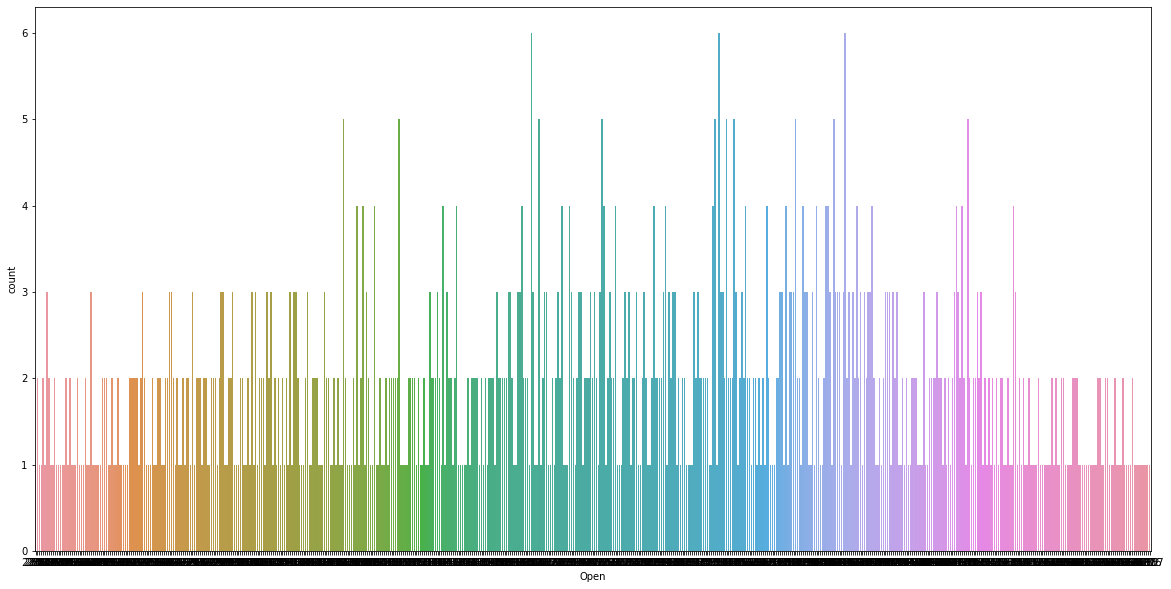

In [12]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize = (20, 10))
sns.countplot(df['Open']);


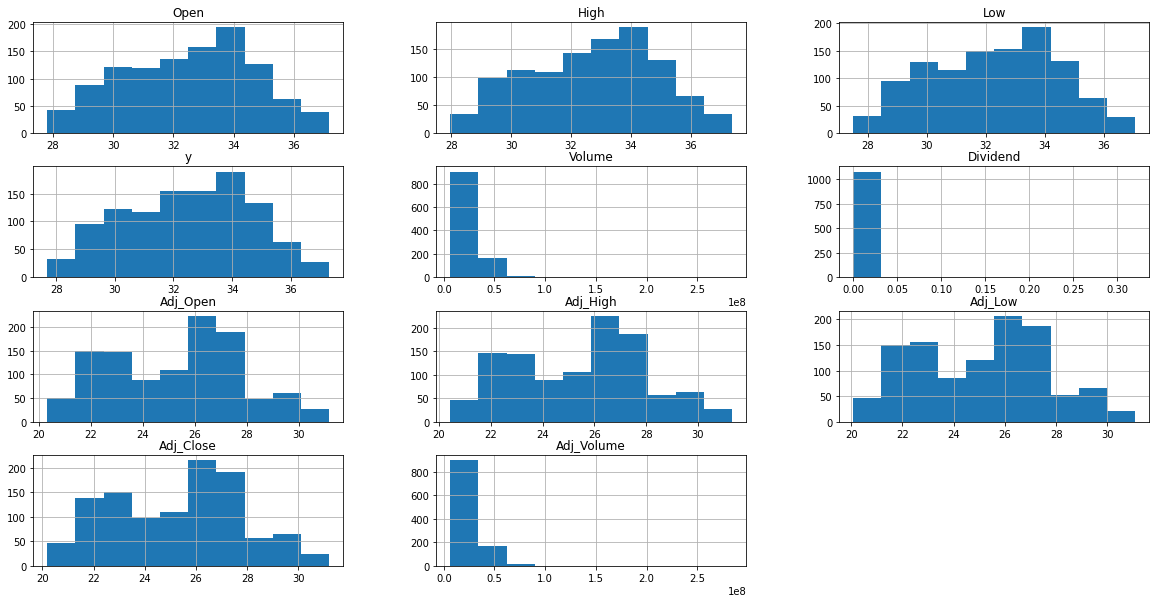

In [13]:
df.hist(figsize = (20, 10))
plt.show()

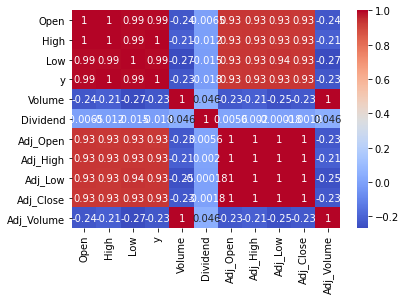

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap= 'coolwarm');

In [71]:
#split into a training data set and a test set
#df = df[['ds', 'y']]
df.head()
train=df[:1000]
test=df[1000:]

In [79]:
m = Prophet(daily_seasonality= True)
m.fit(train)

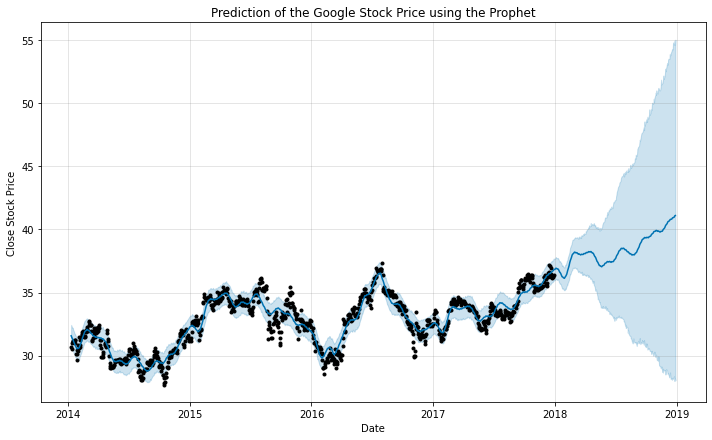

In [80]:
future = m.make_future_dataframe(periods=365)
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]
prediction = m.predict(future)

m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

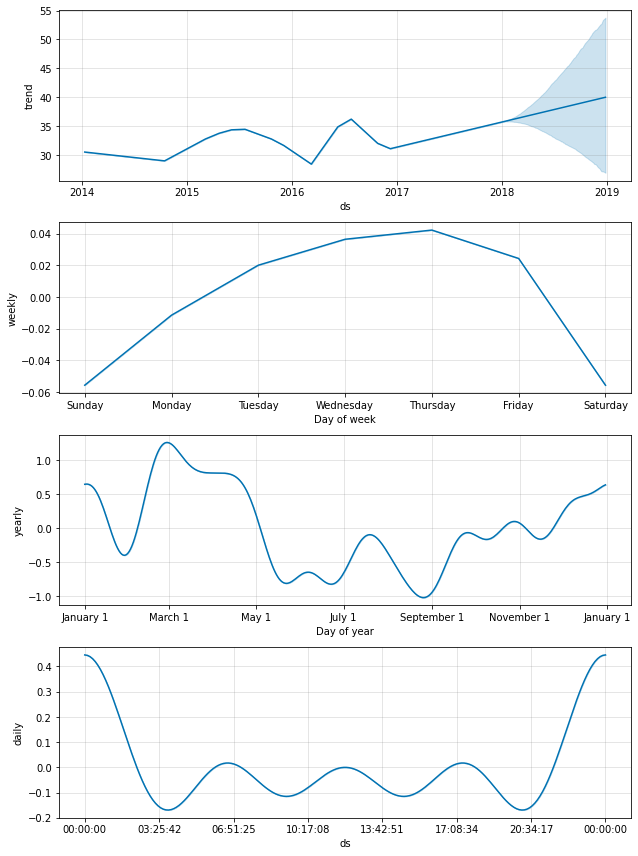

In [81]:
m.plot_components(prediction)
plt.show()

In [69]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-16,30.461643,28.650001,30.383046,30.461643,30.461643,-0.944454,-0.944454,-0.944454,-0.863092,-0.863092,-0.863092,-0.032786,-0.032786,-0.032786,-0.048577,-0.048577,-0.048577,0.0,0.0,0.0,29.517189
1,2014-07-17,30.466623,28.720317,30.393244,30.466623,30.466623,-0.901324,-0.901324,-0.901324,-0.863092,-0.863092,-0.863092,-0.025924,-0.025924,-0.025924,-0.012307,-0.012307,-0.012307,0.0,0.0,0.0,29.565300
2,2014-07-18,30.471604,28.740574,30.499909,30.471604,30.471604,-0.873729,-0.873729,-0.873729,-0.863092,-0.863092,-0.863092,-0.030262,-0.030262,-0.030262,0.019625,0.019625,0.019625,0.0,0.0,0.0,29.597875
3,2014-07-21,30.486546,28.856906,30.537516,30.486546,30.486546,-0.845246,-0.845246,-0.845246,-0.863092,-0.863092,-0.863092,-0.067492,-0.067492,-0.067492,0.085337,0.085337,0.085337,0.0,0.0,0.0,29.641300
4,2014-07-22,30.491526,28.756140,30.570232,30.491526,30.491526,-0.826147,-0.826147,-0.826147,-0.863092,-0.863092,-0.863092,-0.059309,-0.059309,-0.059309,0.096253,0.096253,0.096253,0.0,0.0,0.0,29.665379
